# Capstone project

## Importing libraries

In [1]:
!conda install -c conda-forge geopy

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  21.82 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  34.57 MB/s


In [2]:
import pandas as pd 
import numpy as np 
import requests 
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Data Science Capstone")
import matplotlib.pyplot as plt

## Getting data

### Getting schools data

In [3]:

import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_3a3d9cb89de24675ace899164170aa08 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cZ7LCZRQ0soZVUcquvqKZeMW8IG4A_xY3FNOaYePhuKf',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3a3d9cb89de24675ace899164170aa08.get_object(Bucket='datasciencemachinelearning-donotdelete-pr-5xkkwzevcnf9sv',Key='LISTADO_COLEGIOS_BOGOTA.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_schools = pd.read_csv(body)
df_schools.head()



,calendario,sector,nombreestablecimiento,telefono,nombre_Rector,correo_Electronico,direccion,secretaria,zona,tipo_Establecimiento,...,idiomas,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,internado,estrato_Socio_Economico,año
0,A,NaN,COLEGIO TECNICO DOMINGO FAUSTINO SARMIENTO (IED),2367748 / 2367766 /,MARCO AURELIO VARGAS MORALES,intdidomingofausti12@redp.edu.co,IND TR. 41 NO.95-51,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,NaN,4,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016
1,A,NaN,COLEGIO HELADIA MEJIA (IED),2486831 -- 2551173,NUBIA LUCIA RODRIGUEZ VARGAS,coldiheladiamejia12@redp.edu.co - chalo936@gma...,CL 65 15 A 04,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,NaN,2,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016
2,A,NaN,COLEGIO ROBERT F. KENNEDY (IED),2519559,JAIRO HERNAN TELLEZ SALAZAR,escdirobertkennedy10@redp.edu.co,AV BOYACA 64 H 39,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,NaN,2,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016
3,A,NaN,COLEGIO LUIS VARGAS TEJADA (IED),7411089 -- 2383695,GUSTAVO ADOLFO GALLEGO CASTAÑEDA,coldiluisvargastej16@redp.edu.co,KR 52 C 19 A 76 SUR,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,NaN,2,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016
4,A,NaN,COLEGIO SOTAVENTO (IED),7651003,ORLANDO RIOS ANTOLINEZ,escdisotavento19@redp.edu.co,CL 73 A 16 F 35 SUR,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,NaN,1,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016


### Getting the coordinates of the schools

In [6]:
coordinates = []
for school in df_schools['direccion']:
    location = geolocator.geocode(school + ', Bogota, Colombia')
    if location is not None:
        coordinates.append([location.latitude, location.longitude])
    else:
        coordinates.append([None, None])

GeocoderTimedOut: Service timed out

In [7]:
#The API have a limit, so... 826 should be enough
df_coordinates = pd.DataFrame(coordinates)
df_coordinates.columns = ['Latitud','Longitud']
df_coordinates.shape

(826, 2)

### Lets cut the dataframe to the size of the resulting coordinates

In [8]:
df_schools = df_schools.iloc[0:df_coordinates['Latitud'].size]

### Lets merge the two dataframes

In [9]:
df_schools = pd.concat([df_schools, df_coordinates], axis=1)

### Now we eliminate the rows without coodinates

In [10]:
df_schools = df_schools.iloc[df_schools['Latitud'].dropna().index]

In [11]:
df_schools.head()

,calendario,sector,nombreestablecimiento,telefono,nombre_Rector,correo_Electronico,direccion,secretaria,zona,tipo_Establecimiento,...,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,internado,estrato_Socio_Economico,año,Latitud,Longitud
1,A,NaN,COLEGIO HELADIA MEJIA (IED),2486831 -- 2551173,NUBIA LUCIA RODRIGUEZ VARGAS,coldiheladiamejia12@redp.edu.co - chalo936@gma...,CL 65 15 A 04,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016,4.694550,-74.120600
2,A,NaN,COLEGIO ROBERT F. KENNEDY (IED),2519559,JAIRO HERNAN TELLEZ SALAZAR,escdirobertkennedy10@redp.edu.co,AV BOYACA 64 H 39,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016,4.507666,-74.114071
10,A,NaN,COLEGIO ALEJANDRO OBREGON (IED),2722320 / 2095239,REINERIO GUTIERREZ MELO,cedalejandroobreg18@redp.edu.co,CL 30 SUR 15 45,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016,4.595061,-74.116695
11,A,NaN,COLEGIO FLORIDABLANCA (IED),4382536 / 2527760,MILA ALETH BARRERA SANTISTEBAN,escdifloridablanca10@redp.edu.co,CL 70 A 94 38,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016,4.653520,-74.057848
13,A,NaN,COLEGIO VEINTE DE JULIO (IED),2721598 -- 3660830,GERMAN AUGUSTO AVENDAÑO CHAVES,cedveintedejulio4@redp.edu.co / cedveintedejul...,KR 7 A 24 01 SUR,BOGOTA,URBANA,INSTITUCION EDUCATIVA,...,ANTIGUO-ACTIVO,OFICIAL,OFICIAL,NO APLICA,NO,NaN,NaN,2016,4.682009,-74.037129


### We got rid of useless columns (useless for us at least) and let only data of schools that teach Colombian High School (Grade 11)

In [12]:
df_schools = df_schools[['nombreestablecimiento', 'grados', 'Latitud', 'Longitud']]
df_schools = df_schools[df_schools['grados'].str.contains("11")]
df_schools = df_schools.drop(['grados'], axis=1)

In [13]:
df_schools.reset_index(drop=True, inplace=True)
df_schools.head()

,nombreestablecimiento,Latitud,Longitud
0,COLEGIO HELADIA MEJIA (IED),4.694550,-74.120600
1,COLEGIO ROBERT F. KENNEDY (IED),4.507666,-74.114071
2,COLEGIO ALEJANDRO OBREGON (IED),4.595061,-74.116695
3,COLEGIO FLORIDABLANCA (IED),4.653520,-74.057848
4,COLEGIO VEINTE DE JULIO (IED),4.682009,-74.037129


## Lets built de ICFES DataFrame

In [14]:

body = client_3a3d9cb89de24675ace899164170aa08.get_object(Bucket='datasciencemachinelearning-donotdelete-pr-5xkkwzevcnf9sv',Key='Saber_11__2018-2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_icfes = pd.read_csv(body)
df_icfes.head()



/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,CR,COLOMBIA,M,10/06/2002,20182,SB11201820408513,ESTUDIANTE,COLOMBIA,No,-,...,65.0,90,A2,305,85,2.0,53.169929,NSE3,PUBLICAR,NO
1,TI,COLOMBIA,M,22/10/2000,20182,SB11201820541500,ESTUDIANTE,COLOMBIA,No,-,...,48.0,46,A1,242,46,2.0,45.062853,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
2,TI,COLOMBIA,M,19/12/2001,20182,SB11201820208467,ESTUDIANTE,COLOMBIA,No,-,...,47.0,42,A-,241,45,2.0,44.806936,NSE2,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,20/10/2000,20182,SB11201820514682,ESTUDIANTE,COLOMBIA,No,-,...,63.0,86,A2,310,87,3.0,73.630225,NSE4,PUBLICAR,NO
4,CC,COLOMBIA,M,16/11/1998,20182,SB11201820306251,ESTUDIANTE,COLOMBIA,No,-,...,56.0,71,A1,257,57,3.0,49.391007,NSE2,PUBLICAR,GENERACION E - GRATUIDAD


### We get the name and the score 

In [15]:
df_icfes = df_icfes[['COLE_NOMBRE_ESTABLECIMIENTO', 'PUNT_GLOBAL']]

### we get the mean of the scores by school

In [16]:
df_icfes_by_school = df_icfes.groupby(['COLE_NOMBRE_ESTABLECIMIENTO']).mean()
df_icfes_by_school.reset_index(inplace = True)

In [17]:
df_data = df_schools.merge(df_icfes_by_school, left_on='nombreestablecimiento', right_on='COLE_NOMBRE_ESTABLECIMIENTO', how='left')

Ok, the data is a little tricky, lets see if we can get a little more result by making similar the names in the two data frames

In [18]:
df_icfes_by_school[df_icfes_by_school['COLE_NOMBRE_ESTABLECIMIENTO'].str.contains("CAFAM")]

,COLE_NOMBRE_ESTABLECIMIENTO,PUNT_GLOBAL
516,COL CAFAM,333.295720
1438,COLEGIO CAFAM LA ESPERANZA (IED),264.681034
1439,COLEGIO CAFAM SANTA LUCIA (IED),270.033613
8745,LIC CAMPESTRE CAFAM,323.640000


In this data frame the schools have 'COLEGIO' but in the othe one it says 'CENT EDUC DIST', so lets replace it, and the (IED) in the end, and lets elimite white spaces

In [19]:
df_schools.replace({'nombreestablecimiento': 'CENT EDUC DIST'}, {'nombreestablecimiento': 'COLEGIO'}, regex=True, inplace=True)
df_schools['nombreestablecimiento'] = df_schools['nombreestablecimiento'].str.strip()

In [20]:
df_icfes_by_school.replace({'COLE_NOMBRE_ESTABLECIMIENTO': ' /(IED/)'}, {'COLE_NOMBRE_ESTABLECIMIENTO': ''}, regex=True, inplace=True)
df_icfes_by_school['COLE_NOMBRE_ESTABLECIMIENTO'] = df_icfes_by_school['COLE_NOMBRE_ESTABLECIMIENTO'].str.strip()

In [22]:
df_data = df_schools.merge(df_icfes_by_school, left_on='nombreestablecimiento', right_on='COLE_NOMBRE_ESTABLECIMIENTO', how='left')
df_data

,nombreestablecimiento,Latitud,Longitud,COLE_NOMBRE_ESTABLECIMIENTO,PUNT_GLOBAL
0,COLEGIO HELADIA MEJIA (IED),4.694550,-74.120600,COLEGIO HELADIA MEJIA (IED),264.188034
1,COLEGIO ROBERT F. KENNEDY (IED),4.507666,-74.114071,COLEGIO ROBERT F. KENNEDY (IED),270.012048
2,COLEGIO ALEJANDRO OBREGON (IED),4.595061,-74.116695,COLEGIO ALEJANDRO OBREGON (IED),274.000000
3,COLEGIO FLORIDABLANCA (IED),4.653520,-74.057848,COLEGIO FLORIDABLANCA (IED),264.391304
4,COLEGIO VEINTE DE JULIO (IED),4.682009,-74.037129,COLEGIO VEINTE DE JULIO (IED),247.060606
5,COLEGIO MARSELLA (IED),4.685260,-74.035746,COLEGIO MARSELLA (IED),286.496894
6,COLEGIO MANUELA AYALA DE GAITAN (IED),4.657256,-74.060969,COLEGIO MANUELA AYALA DE GAITAN (IED),277.460870
7,COLEGIO NUEVO SAN ANDRES DE LOS ALTOS (IED),4.623614,-74.195239,COLEGIO NUEVO SAN ANDRES DE LOS ALTOS (IED),259.436170
8,COLEGIO ATABANZHA (IED),4.505157,-74.114520,COLEGIO ATABANZHA (IED),249.867470
9,COLEGIO TOBERIN (IED),4.748212,-74.054907,COLEGIO TOBERIN (IED),271.160000


In [21]:
df_data.iloc[df_data['PUNT_GLOBAL'].dropna().index]

,nombreestablecimiento,Latitud,Longitud,COLE_NOMBRE_ESTABLECIMIENTO,PUNT_GLOBAL
0,COLEGIO HELADIA MEJIA (IED),4.694550,-74.120600,COLEGIO HELADIA MEJIA (IED),264.188034
1,COLEGIO ROBERT F. KENNEDY (IED),4.507666,-74.114071,COLEGIO ROBERT F. KENNEDY (IED),270.012048
2,COLEGIO ALEJANDRO OBREGON (IED),4.595061,-74.116695,COLEGIO ALEJANDRO OBREGON (IED),274.000000
3,COLEGIO FLORIDABLANCA (IED),4.653520,-74.057848,COLEGIO FLORIDABLANCA (IED),264.391304
4,COLEGIO VEINTE DE JULIO (IED),4.682009,-74.037129,COLEGIO VEINTE DE JULIO (IED),247.060606
5,COLEGIO MARSELLA (IED),4.685260,-74.035746,COLEGIO MARSELLA (IED),286.496894
6,COLEGIO MANUELA AYALA DE GAITAN (IED),4.657256,-74.060969,COLEGIO MANUELA AYALA DE GAITAN (IED),277.460870
7,COLEGIO NUEVO SAN ANDRES DE LOS ALTOS (IED),4.623614,-74.195239,COLEGIO NUEVO SAN ANDRES DE LOS ALTOS (IED),259.436170
8,COLEGIO ATABANZHA (IED),4.505157,-74.114520,COLEGIO ATABANZHA (IED),249.867470
9,COLEGIO TOBERIN (IED),4.748212,-74.054907,COLEGIO TOBERIN (IED),271.160000


In [ ]:
df_data = df_data.drop(['COLE_NOMBRE_ESTABLECIMIENTO'], axis=1)

In [23]:
df_data.head()

,nombreestablecimiento,Latitud,Longitud,PUNT_GLOBAL
0,COLEGIO HELADIA MEJIA (IED),4.694550,-74.120600,264.188034
1,COLEGIO ROBERT F. KENNEDY (IED),4.507666,-74.114071,270.012048
2,COLEGIO ALEJANDRO OBREGON (IED),4.595061,-74.116695,274.000000
3,COLEGIO FLORIDABLANCA (IED),4.653520,-74.057848,264.391304
4,COLEGIO VEINTE DE JULIO (IED),4.682009,-74.037129,247.060606


Bellow yoy can see the distribution of the data scores

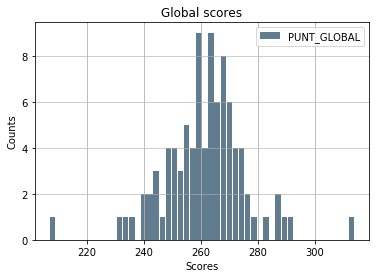

In [136]:
size, scale = 1000, 10

df_data[['PUNT_GLOBAL']].plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')
plt.title('Global scores')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

## Now the dataframe is ready lets search in foursquare information about venues near every school

### Configure Foursquare

In [24]:
CLIENT_ID = 'S3VUKIK1S1Q4NZFKBFQPIFUCTQNJGNJCFWBKLAOR3DT452SY' # your Foursquare ID
CLIENT_SECRET = '3LFFPCHINHQOGAMPIJ1OWY1T15OGDXIMECOVRGY3MPVLT3YK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 1000 # define radius

### Define method to get venues

In [133]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['nombreestablecimiento',
                  'Venue',
                  'Venue Category']
    
    return(nearby_venues)

### We get the venues near every school

In [134]:
school_venues = getNearbyVenues(names=df_data['nombreestablecimiento'],
                                   latitudes=df_data['Latitud'],
                                   longitudes=df_data['Longitud']
                                  )

In [116]:
grouped_schools = pd.DataFrame(school_venues.groupby(by = 'nombreestablecimiento', axis=0)['Venue Category'].apply(lambda x:', '.join(x)))
grouped_schools.reset_index(inplace=True)
school_venues_count = pd.get_dummies(grouped_schools['Venue Category'].str.get_dummies(sep=', '))
school_venues_count['nombreestablecimiento'] = df_data['nombreestablecimiento'] 
school_venues_count['PUNT_GLOBAL'] = df_data['PUNT_GLOBAL']
school_venues_count.dropna(inplace=True)
school_venues_count = school_venues_count.reset_index(drop=True)


## Get 10 the most common venues

### So, lets look for correlations

In [155]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = school_venues_count.drop(['nombreestablecimiento', 'PUNT_GLOBAL'], axis=1)
y = school_venues_count['PUNT_GLOBAL']

prd = LinearRegression()
rfe = RFE(prd, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [156]:
features = []
for idx, val in enumerate(rfe.ranking_):
    if val == 1:
        features.append(idx)
features

[48, 53, 59, 87, 89, 100, 101, 189, 197, 240]

We keep only the best features

In [157]:
X_features = X.iloc[:, features]

The venues that affect the most to the ICFES results are:

In [158]:
X.iloc[:, features].columns

Index(['Car Wash', 'Chinese Restaurant', 'Comfort Food Restaurant',
       'Flea Market', 'Food', 'Gastropub', 'Gay Bar', 'Roof Deck',
       'Shopping Plaza', 'Wings Joint'],
      dtype='object')

Now lets calculate the correlation of each feature

In [182]:
from scipy.stats import pearsonr
for feature in X.iloc[:, features].columns:
    temp_corr, _ = pearsonr(X_features[feature], y)
    print(feature)
    print(temp_corr)
    print()

Car Wash
0.145766066257

Chinese Restaurant
-0.0606510097239

Comfort Food Restaurant
-0.127732430463

Flea Market
-0.08288025501

Food
0.0182476942593

Gastropub
0.0590529981259

Gay Bar
-0.0117665688057

Roof Deck
0.0896350974092

Shopping Plaza
0.0896350974092

Wings Joint
-0.140851116428



There is not strong correlation of any of the features with the outcome, therefore we may conclude that there is not way to predict this ICFES score based on the venues nearby. But to prove this we can make a machine learning model trying to predict the outcome

### We split the data into train and test sets

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The coefficent for each Venues are

In [161]:
pd.DataFrame([X.iloc[:, features].columns , lr_model.coef_])

,0,1,2,3,4,5,6,7,8,9
0,Car Wash,Chinese Restaurant,Comfort Food Restaurant,Flea Market,Food,Gastropub,Gay Bar,Roof Deck,Shopping Plaza,Wings Joint
1,38.4731,2.12205,-22.4255,-3.64083,9.02904,3.24429,3.33549,3.33549,3.33549,-16.0316


As you can see there is no strong correlation of any of the features

In [162]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [163]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df  

,Actual,Predicted
40,250.740000,263.585644
22,243.910891,263.585644
55,291.454023,228.372832
88,272.382353,263.585644
0,264.188034,263.585644
26,259.504000,256.583099
39,251.185185,263.585644
66,268.055944,247.554060
10,259.555000,243.282181
44,275.085973,263.585644


Bellow you can observate the distribution of the actual values

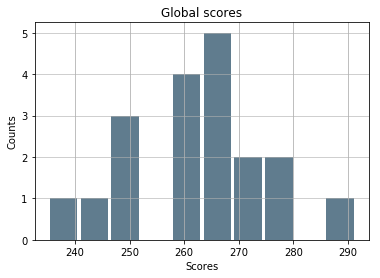

In [164]:
size, scale = 1000, 10

y_test.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Global scores')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

And the distribution of the predicted values

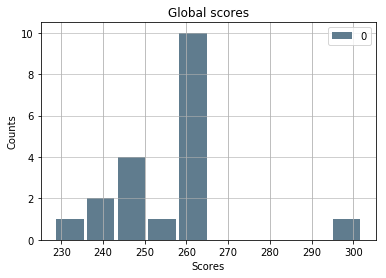

In [165]:
size, scale = 1000, 10

pd.DataFrame(y_pred_test).plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Global scores')
plt.xlabel('Scores')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [166]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))  

Mean Absolute Error: 17.2136571016
Mean Squared Error: 518.503733809
Root Mean Squared Error: 22.7706770608


In [167]:
y.describe()

count     91.000000
mean     261.447387
std       14.361094
min      207.000000
25%      253.605908
50%      262.827225
75%      268.878862
max      313.875000
Name: PUNT_GLOBAL, dtype: float64

## Conclusion

As we can see, the model is not capable of predict the outcome of the schools average score based on the venues categories near by. The Root Mean Squared Error in the test set is even higher than the standard desviation, therefore we can say there is not relation between the venues categories and the performance of students in national.

Finaly, your kids can go to a schools with a bar beside, its not that important.